# SRAG (SARS) data exploration from Brazil's OpenDataSUS

This notebook is meant to explore and understand the data contained in the SRAG data from Brazil's OpenDataSUS data. This data is available at [the OpenDataSUS website](https://opendatasus.saude.gov.br/dataset/bd-srag-2020).

The data is divided into the 2020 data and the earlier data. The first step is to download the data and consume it into `pandas` dataframes.

To download the data, we use the bash script `GET_DATA.sh`, which contains the following code, that downloads and checks the data for the project:

In [1]:
!pygmentize GET_DATA.sh

#!/bin/bash

BLUE="\e"
WHITE="\e"
RED="\e"
GREEN="\e"

MESSAGE="${BLUE} -> "
ERROR="${RED}ERROR: ${WHITE}"
SUCCESS="${GREEN}"

# This scripts gets all the data from the SRAG databases from Brazil's OpenDataSUS. The script verifies if the files exist and verifies the SHA256 sums.
echo
echo -e "${MESSAGE}Creating data directory..."
echo 
mkdir -p data

sums=(`cat sums | awk '{print $1}'`)

# The 2020 data constantly moves between adresses, since it's updated every few days, containing the new data. To get the data
# we use some grep magic
link2020=`curl -kL https://opendatasus.saude.gov.br/dataset/bd-srag-2020 | grep -o "https:.*\.csv"`

links=("https://opendatasus.saude.gov.br/dataset/18254c56-0859-4073-a6ea-977c8b85bd28/resource/861e8067-a23d-49f6-93a7-9b83c2f802ac/download/influd14_limpo-final.csv" "https://opendatasus.saude.gov.br/dataset/18254c56-0859-4073-a6ea-977c8b85bd28/resource/e5f0102f-a2e5-41d9-ac05-88e438c578ce/download/influd15_limpo-final.csv" "https://opendatasus.saude.go

In [57]:
!bash GET_DATA.sh


 -> Creating data directory...

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23037  100 23037    0     0  29686      0 --:--:-- --:--:-- --:--:-- 29648
 -> Checking if already exists...
data/2014.csv already exists!
 -> Checking if already exists...
data/2015.csv already exists!
 -> Checking if already exists...
data/2016.csv already exists!
 -> Checking if already exists...
data/2017.csv already exists!
 -> Checking if already exists...
data/2018.csv already exists!
 -> Checking if already exists...
data/2019.csv already exists!
 -> Downloading the 2020 data...
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  254M  100  254M    0     0  18.9M      0  0:00:13  0:00:13 --:--:-- 15.6M
Successfully downloaded all files!


After downloading the data, the next step is to consume it into `pandas` dataframes. The basic structure of the data is described in the dictionary files, which can be found in [this directory](./dictionary_files).

Since the idea is to use the data from before 2020 as a control data, not containing any cases of covid-19, the data is imported into two dataframes, the `df_2020` dataframe and the `df_control` dataframe.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
%matplotlib inline
!pip install chart_studio
import chart_studio
API_KEY='6IKNK0emp90jIMnM4z1I'
chart_studio.tools.set_credentials_file(username='ptecodev', api_key=API_KEY)

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [44]:
df_2020 = None
df_2020 = pd.read_csv('data/2020.csv', encoding='latin2', sep=';', low_memory=False)

In [56]:
# reading all dataframes
dfs = []
for year in range(2014, 2020, 1):
    dfs += [pd.read_csv('data/{}.csv'.format(year), encoding='latin2', sep=';', low_memory=False)]

# and concatenating them together
df_control = pd.concat(dfs, sort=True, ignore_index=True, join='inner')
dfs += [df_2020]

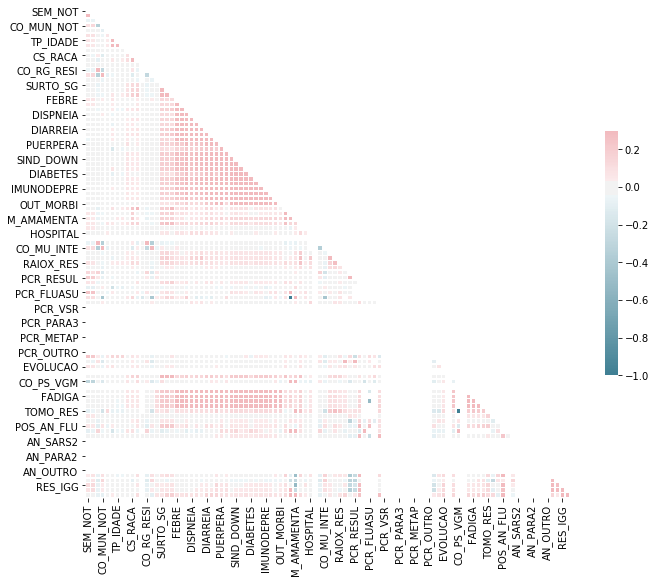

In [5]:
corr = df_2020.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [54]:
py.plot(px.bar(df_2020[df_2020['CLASSI_FIN'] == 5]['SG_UF_NOT'].value_counts()))

'https://plotly.com/~ptecodev/43/'

The 2020 dataframe does not contain all the data described in it's dictionary files, and the control dataframe contains many more columns than the 2020 one.  
To adress that issue, we convert the control dataframe as to contain only the intersection between the columns of the two dataframes.

In [4]:
df_control=df_control[df_control.columns.intersection(df_2020.columns)]
df_2020=df_2020[df_2020.columns.intersection(df_control.columns)]

In [11]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216190 entries, 0 to 216189
Data columns (total 58 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   AMOSTRA     214945 non-null  float64
 1   ANTIVIRAL   212857 non-null  float64
 2   CARDIOPATI  181335 non-null  float64
 3   CLASSI_FIN  212088 non-null  float64
 4   CLASSI_OUT  1670 non-null    object 
 5   CO_MU_INTE  212174 non-null  float64
 6   CRITERIO    209678 non-null  float64
 7   CS_ESCOL_N  204830 non-null  float64
 8   CS_GESTANT  216179 non-null  float64
 9   CS_RACA     208797 non-null  float64
 10  CS_SEXO     216190 non-null  object 
 11  DESC_RESP   212352 non-null  float64
 12  DIARREIA    47247 non-null   float64
 13  DISPNEIA    214146 non-null  float64
 14  DT_ANTIVIR  133422 non-null  object 
 15  DT_COLETA   187112 non-null  object 
 16  DT_DIGITA   199419 non-null  object 
 17  DT_ENCERRA  211287 non-null  object 
 18  DT_ENTUTI   74328 non-null   object 
 19  DT

In [14]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522262 entries, 0 to 522261
Data columns (total 58 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DT_NOTIFIC  522262 non-null  object 
 1   SEM_NOT     522262 non-null  int64  
 2   DT_SIN_PRI  522262 non-null  object 
 3   SG_UF_NOT   522262 non-null  object 
 4   ID_MUNICIP  522262 non-null  object 
 5   CS_SEXO     522262 non-null  object 
 6   DT_NASC     521074 non-null  object 
 7   NU_IDADE_N  522262 non-null  int64  
 8   CS_GESTANT  522262 non-null  int64  
 9   CS_RACA     437445 non-null  float64
 10  CS_ESCOL_N  365514 non-null  float64
 11  SG_UF       522194 non-null  object 
 12  ID_MN_RESI  522194 non-null  object 
 13  FEBRE       467370 non-null  float64
 14  TOSSE       472659 non-null  float64
 15  GARGANTA    402890 non-null  float64
 16  DISPNEIA    467125 non-null  float64
 17  DESC_RESP   440634 non-null  float64
 18  SATURACAO   439404 non-null  float64
 19  DI

With this change, we freed up over 100MB of memory, and also preventend some processing errors in the future. As it is clear, also, the column data types are unevenly distributed in the different DFs, therefore some conversion from categorical into numeric data is necessary.

After these changes, the first analysis is in the 'CLASSI_FIN' column of the dataframe, which contains the final diagnosis of the reported case. This diagnosis is divided into 5 categories:
1. Influenza caused SARS
2. Other virus caused SARS
3. Other causes SARS
4. Unidientified causes SARS
5. COVID-19 caused SARS

In [5]:

classes = ['Influenza', 'Other Viruses', 'Other Causes', 'Unknown Cause', 'COVID-19']

In [6]:
value_counts_per_year = list(map(lambda x: x['CLASSI_FIN'].value_counts().sort_index().values, dfs))

In [7]:
bar_plots = list(
    map(
        lambda x: go.Bar(
            name='{}'.format(2014 + x[0]), 
            x=classes,
            y=list(x[1])
        ), 
        enumerate(value_counts_per_year)
    )
)
fig_per_year=go.Figure(bar_plots)

In [21]:
import chart_studio.plotly as py
py.plot(go.Figure(fig_per_year), filename = 'gdp_per_cap', auto_open=True)

'https://plotly.com/~ptecodev/1/'

In [70]:
figs_per_year = bar_plots = value_counts_per_year = None

In [78]:
bar_plots_all_years = [
    go.Bar(name='after 2020', x=classes, y=df_2020['CLASSI_FIN'].value_counts().sort_index().values),
    go.Bar(name='sum of years since 2014 until 2019', x=classes, y=df_control['CLASSI_FIN'].value_counts().sort_index().values),
]

fig_all_years=go.Figure(bar_plots_all_years)
py.plot(fig_all_years, filename = 'all_years_bar_covid', auto_open=True)

'https://plotly.com/~ptecodev/8/'

In [79]:
code_to_sg = {
    11: 'RO',
    12: 'AC',
    13: 'AM',
    14: 'RR',
    15: 'PA',
    16: 'AP',
    17: 'TO',
    21: 'MA',
    22: 'PI',
    23: 'CE',
    24: 'RN',
    25: 'PB',
    26: 'PE',
    27: 'AL',
    28: 'SE',
    29: 'BA',
    31: 'MG',
    32: 'ES',
    33: 'RJ',
    35: 'SP',
    41: 'PR',
    42: 'SC',
    43: 'RS',
    50: 'MS',
    51: 'MT',
    52: 'GO',
    53: 'DF'
}
df_control['SG_UF_NOT'] = df_control['SG_UF_NOT'].replace(code_to_sg)
states_2020 = df_2020[df_2020['CLASSI_FIN'] == 5]['SG_UF_NOT'].value_counts().sort_index()
states_control = df_control[df_2020['CLASSI_FIN'] == 4]['SG_UF_NOT'].value_counts().sort_index()

bar_plots_all_years = [
    go.Bar(name='After 2020', x=states_2020.index, y=states_2020.values),
    go.Bar(name='Before 2020', x=states_control.index, y=states_control.values),
]

fig_all_years=go.Figure(bar_plots_all_years)
py.plot(fig_all_years, filename = 'all_year_by_state', auto_open=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:32: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



'https://plotly.com/~ptecodev/45/'

In [72]:
bar_plots_all_years = fig_all_years = None

In [16]:
df_total=None
df_total=pd.concat(dfs, sort=True)[['DT_SIN_PRI', 'CLASSI_FIN']]
df_total['DT_SIN_PRI'] = pd.to_datetime(df_total['DT_SIN_PRI'], format="%d/%m/%Y")

In [119]:
dfs = None

In [75]:
unk2020ts = df_total[df_total['CLASSI_FIN'] == 4].groupby('DT_SIN_PRI').count()['CLASSI_FIN']
cov2020ts = df_total[df_total['CLASSI_FIN'] == 5].groupby('DT_SIN_PRI').count()['CLASSI_FIN']

line_plots_2020_unk_vs_cov = [
    go.Line(name='unknown cause cases', x=unk2020ts.index, y=unk2020ts.sort_index().values),
    go.Line(name='COVID caused cases', x=cov2020ts.index, y=cov2020ts.sort_index().values),
]
line_fig_all_years=go.Figure(line_plots_2020_unk_vs_cov)
py.plot(line_fig_all_years, filename = '2020_line_causes', auto_open=True)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




'https://plotly.com/~ptecodev/10/'

In [76]:
dfs= unk2020ts = cov2020ts = line_plots_2020_unk_vs_cov = line_fig_all_years = None

These graphs clearly show that the amount of reported cases increased deeply in 2020, both from COVID and unidientified cases. This is the main focus of the project, to see if the amount of unidentified cases is actually a misrepresentation of COVID caused cases. 

# Feature Selection
The next step of the way was selecting the features that would be used as base features from the dataframe columns. At first, the columns chosen were these:
> SG_UF_NOT, CS_SEXO, TP_IDADE, NU_IDADE_N, CS_RACA, SURTO_SG, NOSOCOMIAL, AVE_SUINO, FEBRE, TOSSE, GARGANTA, DISPNEIA, DESC_RESP, SATURACAO, DIARREIA, VOMITO, OUTRO_SIN, PUERPERA, CARDIOPATI, HEMATOLOGI, SIND_DOWN, HEPATICA, ASMA, DIABETES, NEUROLOGIC, PNEUMOPATI, IMONODEPRE, RENAL, OBESIDADE, VACINA, ANTIVIRAL, TP_ANTIVIR, HOSPITAL, UTI, SUPORT_VEN, RAIOX_RES, AMOSTRA, TP_AMOSTRA, CRITERIO, EVOLUCAO.

These columns describe the basic features of the patient, such as age, sex, self declared race, as well as diagnostic components like symptoms and exams, and also the risk factors of the patient.

The CRITERIO and EVOLUCAO columns describe the criteria on which the final diagnosis was based and if the patient was cured or came to pass, respectively.

In [8]:
feature_list = ['CS_SEXO',
                'CS_RACA',
                'FEBRE',
                'TOSSE',
                'GARGANTA',
                'DISPNEIA',
                'DESC_RESP',
                'SATURACAO',
                'OUTRO_SIN',
                'PUERPERA',
                'CARDIOPATI',
                'SIND_DOWN',
                'HEPATICA',
                'NEUROLOGIC',
                'PNEUMOPATI',
                'RENAL',
                'OBESIDADE',
                'VACINA',
                'ANTIVIRAL',
                'HOSPITAL',
                'UTI',
                'SUPORT_VEN',
                'RAIOX_RES',
                'EVOLUCAO'
               ]

In [193]:
data_dir = './data'

In [9]:
def categorize_and_fill(df_in):
    # feature_list is the list of selected features
    df_out_X = df_in[feature_list + ['CLASSI_FIN', 'DT_SIN_PRI']]
    
    
    # converting categorical into numeric
        
    df_out_X.loc[:,'CS_SEXO'] = df_out_X['CS_SEXO'].astype('category').cat.codes
    
    # filling the null values with the 'ignored' token
    df_out_X = df_out_X.dropna()

    
    return df_out_X


In [10]:
df_2020 = categorize_and_fill(df_2020)
df_control = categorize_and_fill(df_control)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
valid_index_2020 = df_2020['CLASSI_FIN'] == 5
valid_index_control = df_control['CLASSI_FIN'] == 4

full_df = pd.concat([df_2020[valid_index_2020], df_control[valid_index_control]], ignore_index=True, sort=False)


In [24]:
def plot_correlation_matrix(df):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=np.bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
full_df.loc[full_df['CLASSI_FIN'] == 4, 'CLASSI_FIN'] = 0
full_df.loc[full_df['CLASSI_FIN'] == 5, 'CLASSI_FIN'] = 1
full_df['DT_SIN_PRI'] = pd.to_datetime(full_df['DT_SIN_PRI'], format="%d/%m/%Y")

In [12]:
full_df[full_df['DT_SIN_PRI'] < '2020']

,CS_SEXO,CS_RACA,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,OUTRO_SIN,PUERPERA,...,OBESIDADE,VACINA,ANTIVIRAL,HOSPITAL,UTI,SUPORT_VEN,RAIOX_RES,EVOLUCAO,CLASSI_FIN,DT_SIN_PRI
0,2,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,6.0,2.0,5.0,02/03/2020
1,0,4.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,5.0,17/02/2020
2,2,9.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,...,2.0,2.0,1.0,1.0,2.0,3.0,6.0,1.0,5.0,01/03/2020
4,0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,5.0,11/03/2020
5,0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,5.0,12/03/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142035,2,4.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,...,2.0,9.0,1.0,1.0,1.0,1.0,5.0,2.0,4.0,19/12/2019
142036,2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,2.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,4.0,11/12/2019
142038,2,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,9.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,18/12/2019
142039,0,4.0,2.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,...,2.0,9.0,2.0,1.0,1.0,2.0,2.0,1.0,4.0,17/12/2019


In [14]:
full_df['STAGE'] = full_df['DT_SIN_PRI'] > '2020'

In [43]:
for feature in feature_list:
    if feature == 'TP_IDADE':
        continue
    tt = full_df[full_df['DT_SIN_PRI'] > '2020'][feature]
    before = full_df[full_df['DT_SIN_PRI'] < '2020'][feature]
    print("Post 2020: ")
    print(tt.value_counts())
    print("Pre 2020: ")
    print(before.value_counts())
    

Post 2020: 
2    26091
0    21761
1       15
Name: CS_SEXO, dtype: int64
Pre 2020: 
2    47514
0    46644
1       19
Name: CS_SEXO, dtype: int64
Post 2020: 
1.0    19391
4.0    17095
9.0     7935
2.0     2746
3.0      578
5.0      122
Name: CS_RACA, dtype: int64
Pre 2020: 
1.0    52801
4.0    23836
9.0    12080
2.0     4087
5.0      761
3.0      612
Name: CS_RACA, dtype: int64
Post 2020: 
1.0    32656
2.0    14408
9.0      803
Name: FEBRE, dtype: int64
Pre 2020: 
1.0    77091
2.0    16184
9.0      902
Name: FEBRE, dtype: int64
Post 2020: 
1.0    36013
2.0    11171
9.0      683
Name: TOSSE, dtype: int64
Pre 2020: 
1.0    83591
2.0     9797
9.0      789
Name: TOSSE, dtype: int64
Post 2020: 
2.0    37649
1.0     8526
9.0     1692
Name: GARGANTA, dtype: int64
Pre 2020: 
2.0    68584
1.0    15408
9.0    10185
Name: GARGANTA, dtype: int64
Post 2020: 
1.0    36030
2.0    11220
9.0      617
Name: DISPNEIA, dtype: int64
Pre 2020: 
1.0    77501
2.0    15823
9.0      853
Name: DISPNEIA, dtype: in

In [41]:
import plotly.express as px
plt = px.bar(x=['YES', 'NO', 'IGNORED'], y=full_df[[not x for x in full_df["STAGE"]]]['PUERPERA'].value_counts().sort_index())

In [42]:
py.plot(plt, filename = 'PUERPERA', auto_open=True)

'https://plotly.com/~ptecodev/37/'

In [85]:
full_df = None

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
X_2020, y_2020 = df_2020[df_2020['CLASSI_FIN'] == 4][[x for x in feature_list if x != 'TP_IDADE']].values, df_2020[df_2020['CLASSI_FIN'] == 4]['CLASSI_FIN'].values
X_2020, y_2020, shuffle(X_2020, y_2020)
total_X, total_Y = full_df[[x for x in feature_list if x != 'TP_IDADE']].values, full_df['CLASSI_FIN'].values
total_X, total_Y = shuffle(total_X, total_Y)

In [48]:
total_X = MinMaxScaler().fit_transform(total_X)
train_X, test_X, train_y, test_y = train_test_split(total_X, total_Y)
val_X, test_X, val_y, test_y = train_test_split(test_X, test_y)
X_2020 = MinMaxScaler().fit_transform(X_2020)
y_2020 = MinMaxScaler().fit_transform(y_2020.reshape(1,-1))


In [51]:
len(X_2020)

41643

In [34]:
data_dir='./data'

In [49]:
def save_data(train_X, val_X, test_X, train_y, val_y, test_y ):
    pd.concat([pd.DataFrame(train_y),pd.DataFrame(train_X)], axis=1).to_csv(data_dir+'/train.csv', index=False, header=False)
    pd.concat([pd.DataFrame(val_y),pd.DataFrame(val_X)], axis=1).to_csv(data_dir+'/val.csv', index=False, header=False)
    pd.concat([pd.DataFrame(test_y),pd.DataFrame(test_X)], axis=1).to_csv(data_dir+'/test.csv', index=False, header=False)
    pd.concat([pd.DataFrame(X_2020)], axis=1).to_csv(data_dir+'/x_test_2020.csv', index=False, header=False)
    pd.DataFrame(y_2020[0]).to_csv(data_dir+'/y_test_2020.csv', index=False,header=False)

In [50]:
save_data(train_X, val_X, test_X, train_y, val_y, test_y)

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
150273,0.0
150274,0.0
150275,0.0
150276,0.0
